Parameter values:
b=0.05
mu=0.1
gamma=0.25
alpha=0.1
f=0.7
Endpoint of epidemic with starting values y0=0.1, z0=0.9: 
y=0.179215212778, z=0.313070597484
Endpoint of epidemic with starting values y0=0.2, z0=0.8: 
y=0.171475756034, z=0.309359156688
Endpoint of epidemic with starting values y0=0.3, z0=0.7: 
y=0.169273359397, z=0.305202521555
Endpoint of epidemic with starting values y0=0.4, z0=0.6: 
y=0.168618827739, z=0.301771421621
Endpoint of epidemic with starting values y0=0.5, z0=0.5: 
y=0.168547775987, z=0.298880890389
Endpoint of epidemic with starting values y0=0.75, z0=0.25: 
y=0.16913025136, z=0.292961521945
Endpoint of epidemic with starting values y0=1.0, z0=0.0: 
y=0.16977100185, z=0.287832643214
Relative R0=1.66666666667


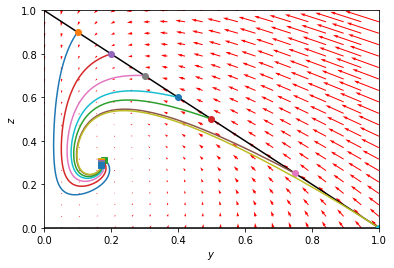

In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Based on chapter 4.4, "Regulation of host populations" from the book "Mathematical modeling of infectious diseases"

# Consider a modified SIR model with additional population dynamics and a death rate for the disease
# This model can be decoupled to a system of two differential equations representing the densities
# of infected and recovered individuals in the population. Therefore a phase plane analysis makes sense.
# Parameters:
# b = birth rate in the population (for S,R)
# mu = death rate (for all categories)
# gamma = infectivity of disease
# alpha = recovery rate for the disease
# f = probability of surviving recovery ((1-f) = prob. death)

# ODE model:
# Let y denote the density of infecteds in the population
#     z denote the density of recovereds in the population
# y' = y(gamma*(1-y-z) - alpha + alpha*(1-f)*y + b(y-1)),
# z' = y(f*alpha + (1-f)*alpha*z) - bz(1-y)
# where the population size N follows
# N' = (b - mu - (b + alpha*(1-f))*y)*N

# Define parameters
f = 0.7
alpha = 0.1
gamma = 0.25
mu = 0.1
b = 0.05

# Define differential equations
def F(Y,t):
    y,z = Y
    dy = y*(gamma*(1-y-z) - alpha + alpha*(1-f)*y + b*(y-1))
    dz = y*(f*alpha + (1-f)*alpha*z) - b*z*(1-y)
    return [dy,dz]


# Define evaluation points
xstart = -0.0
xend = 1
ystart = -0.0
yend = 1
npoints = 20

y1 = np.linspace(xstart,xend, npoints)
y2 = np.linspace(ystart, yend, npoints)

Y1, Y2 = np.meshgrid(y1, y2)

# Initialize arrays of derivatives
u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

# Compute derivatives at evaluation points
t = 0
NI, NJ = Y1.shape
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = F([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
        
Q = plt.quiver(Y1, Y2, u, v, color='r')
plt.xlabel('$y$')
plt.ylabel('$z$')
plt.xlim([xstart, xend])
plt.ylim([ystart, yend])


# Draw line z=1-y, showing interpretable density values
plt.plot([0,1],[1,0],'k-')
plt.plot([1,0],[0,0],'k-')

# Solve the system for some initial values
print("Parameter values:\n"+"b="+str(b)+"\nmu="+str(mu)+"\ngamma="+str(gamma)+"\nalpha="+str(alpha)+"\nf="+str(f))
# Draw some solution lines
for y0 in [0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.0]:
    tspan = np.linspace(0, 100, 200)
    z0 = 1-y0
    Y0 = [y0,z0]
    ys = odeint(F, Y0, tspan)
    plt.plot(ys[:,0], ys[:,1], '-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
    print("Endpoint of epidemic with starting values y0="+str(y0)+", z0="+str(z0)+": \n" +
          "y="+ str(ys[-1,0])+", z="+ str(ys[-1,1]))
    
# We see that the epidemic converges to the same point for different initial conditions
# This point is a stable point of the system that can be proven to be asymptotically stable

# Note: the stable point only exists for values of R0_rel that are > 1
print("Relative R0="+str(gamma / (b + alpha)))

Parameter values:
b=0.05
mu=0.1
gamma=500
alpha=0.1
f=0.7
Analytical limit value of y:0.281754163448
Endpoint of epidemic with starting values y0=0.1, z0=0.9: 
y=0.281708922672, z=0.718036150701
Difference with calculated limit y-coordinate:-4.52407759602e-05
Endpoint of epidemic with starting values y0=0.2, z0=0.8: 
y=0.281708958191, z=0.718036115227
Difference with calculated limit y-coordinate:-4.52052575784e-05
Endpoint of epidemic with starting values y0=0.3, z0=0.7: 
y=0.281708977263, z=0.718036096179
Difference with calculated limit y-coordinate:-4.51861855523e-05
Endpoint of epidemic with starting values y0=0.4, z0=0.6: 
y=0.281709000696, z=0.718036072775
Difference with calculated limit y-coordinate:-4.51627518697e-05
Endpoint of epidemic with starting values y0=0.5, z0=0.5: 
y=0.281709013614, z=0.718036059874
Difference with calculated limit y-coordinate:-4.51498345965e-05
Endpoint of epidemic with starting values y0=0.75, z0=0.25: 
y=0.281709090149, z=0.718035983453
Differen

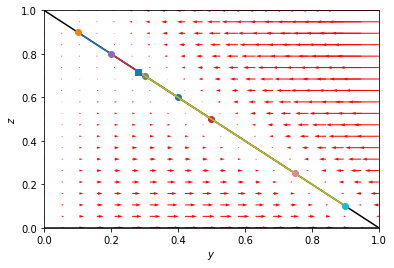

In [35]:
# The y-coordinate of the steady state increases with gamma and approaches y_inf, where
y_inf = alpha + 2*b - np.sqrt(alpha*alpha + 4*b*alpha*f)
y_inf = y_inf / (2 * (b + (1 - f)*alpha))

#
# See if this holds by increasing gamma in the previous:
gamma = 500

# Compute derivatives at evaluation points
t = 0
NI, NJ = Y1.shape
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = F([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
        
Q = plt.quiver(Y1, Y2, u, v, color='r')
plt.xlabel('$y$')
plt.ylabel('$z$')
plt.xlim([xstart, xend])
plt.ylim([ystart, yend])

# Draw line z=1-y, showing interpretable density values
plt.plot([0,1],[1,0],'k-')
plt.plot([1,0],[0,0],'k-')

# Solve the system for some initial values
print("Parameter values:\n"+"b="+str(b)+"\nmu="+str(mu)+"\ngamma="+str(gamma)+"\nalpha="+str(alpha)+"\nf="+str(f))
print("Analytical limit value of y:"+str(y_inf))
# Draw some solution lines
for y20 in [0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 0.9]:
    tspan = np.linspace(0, 100, 200)
    z0 = 1-y20
    y0 = [y20,z0]
    ys = odeint(F, y0, tspan)
    plt.plot(ys[:,0], ys[:,1], '-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
    print("Endpoint of epidemic with starting values y0="+str(y20)+", z0="+str(z0)+": \n" +
          "y="+ str(ys[-1,0])+", z="+ str(ys[-1,1]))
    print("Difference with calculated limit y-coordinate:"+str(ys[-1,0]-y_inf))

print("Relative R0="+str(gamma / (b + alpha)))
# Looks like y is converging to its analytical limit, and the whole limit point seems to stay on the line z=1-y,
# at least for these parameter values

Parameter values:
b=0.06
mu=0.1
gamma=0.25
alpha=0.2
f=0.7
Analytical limit value of y:0.281754163448
Endpoint of epidemic with starting values y0=0.1, z0=0.9: 
y=0.000486952555419, z=0.0040915556209
Endpoint of epidemic with starting values y0=0.2, z0=0.8: 
y=0.000834912847552, z=0.00532411828723
Endpoint of epidemic with starting values y0=0.3, z0=0.7: 
y=0.00108653819088, z=0.00628291067916
Endpoint of epidemic with starting values y0=0.4, z0=0.6: 
y=0.00126961326231, z=0.00704044514672
Endpoint of epidemic with starting values y0=0.5, z0=0.5: 
y=0.0014028680223, z=0.00764760627317
Endpoint of epidemic with starting values y0=0.75, z0=0.25: 
y=0.00159442525754, z=0.00872522020184
Endpoint of epidemic with starting values y0=0.9, z0=0.1: 
y=0.0016483109794, z=0.00917804828787
Relative R0=0.961538461538


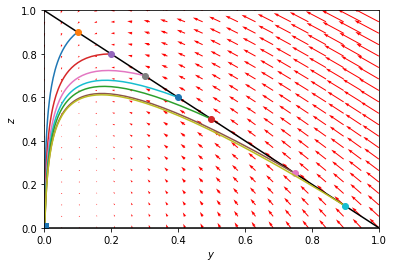

In [37]:
# Now make sure the relative R0 is less than one
# We expect the solutions to converge to the origin in this case

gamma = 0.25
alpha = 0.2
b = 0.06

# Compute derivatives at evaluation points
t = 0
NI, NJ = Y1.shape
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = F([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
        
Q = plt.quiver(Y1, Y2, u, v, color='r')
plt.xlabel('$y$')
plt.ylabel('$z$')
plt.xlim([xstart, xend])
plt.ylim([ystart, yend])

# Draw line z=1-y, showing interpretable density values
plt.plot([0,1],[1,0],'k-')
plt.plot([1,0],[0,0],'k-')

# Solve the system for some initial values
print("Parameter values:\n"+"b="+str(b)+"\nmu="+str(mu)+"\ngamma="+str(gamma)+"\nalpha="+str(alpha)+"\nf="+str(f))
print("Analytical limit value of y:"+str(y_inf))
# Draw some solution lines
for y20 in [0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 0.9]:
    tspan = np.linspace(0, 100, 200)
    z0 = 1-y20
    y0 = [y20,z0]
    ys = odeint(F, y0, tspan)
    plt.plot(ys[:,0], ys[:,1], '-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
    print("Endpoint of epidemic with starting values y0="+str(y20)+", z0="+str(z0)+": \n" +
          "y="+ str(ys[-1,0])+", z="+ str(ys[-1,1]))

print("Relative R0="+str(gamma / (b + alpha)))